In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('C:\\Users\\Alma\\Desktop\\heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
# 303 observations, 13 features, 1 target 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [7]:
# All attributes are numerical(integer and float types)

# No null/missing values

In [8]:
# Summary statistics

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF16D42780>,
      dtype=object)

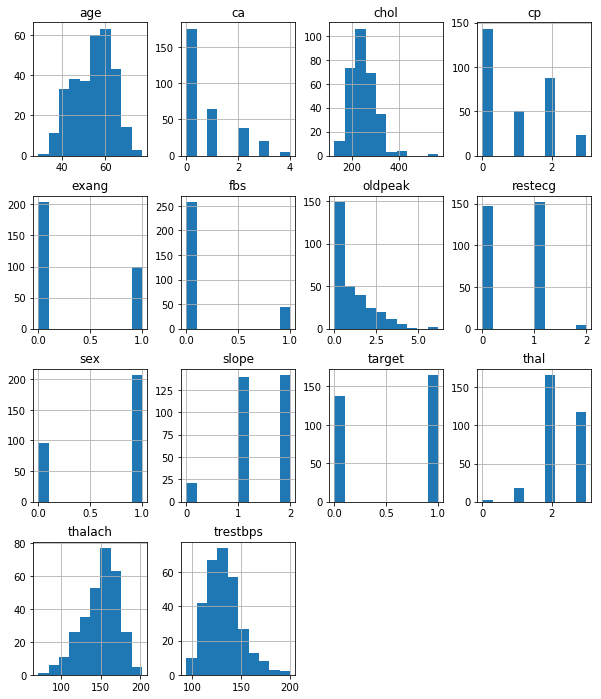

In [34]:
#Histogram for each attribute

df.hist(figsize = (10,12))

In [10]:
#Sex Attribute (1 - Male, 0 - Female)

df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

([<matplotlib.patches.Wedge at 0x1ef163ea588>,
 [Text(-0.5986245291714798, 0.9228481310997082, 'Males'),
  Text(0.5986244427681994, -0.9228481871469777, 'Females')],
 [Text(-0.32652247045717075, 0.503371707872568, '68.32'),
  Text(0.3265224233281087, -0.5033717384438059, '31.68')])

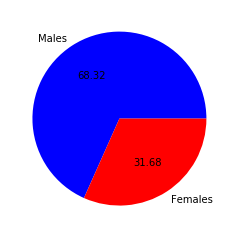

In [31]:
plt.pie(df.sex.value_counts(), 
        labels = ['Males', 'Females'],
        autopct = '%.2f',
        colors = ['blue', 'red'])

In [ ]:
#Male population is higher

In [36]:
#Target (1 - Disease, 0 - No Disease)

df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x1ef164291d0>,
 [Text(-0.1534669293828939, 1.0892418930548835, 'Disease'),
  Text(0.1534670313650796, -1.0892418786862677, 'No Disease')],
 [Text(-0.08370923420885121, 0.5941319416663, '54.46'),
  Text(0.08370928983549797, -0.5941319338288732, '45.54')])

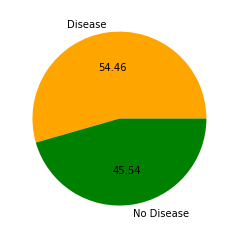

In [32]:
plt.pie(df.target.value_counts(), 
        labels = ['Disease', 'No Disease'],
        autopct = '%.2f',
        colors = ['orange', 'green'])

In [ ]:
#Almost equally distributed target

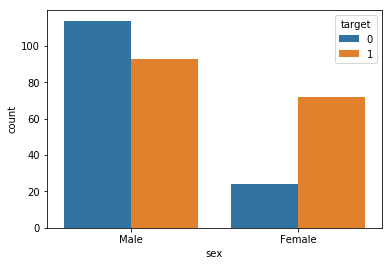

In [59]:
#Sex type and heart disease

sns.countplot(x = 'sex', data = df, hue = 'target')

In [55]:
#

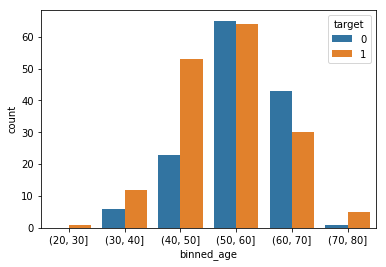

In [56]:
#Age and heart disease

bins = [20,30,40,50,60,70,80]

df['binned_age'] = pd.cut(df['age'], bins)
sns.countplot(x = 'binned_age', data = df, hue = 'target')

In [ ]:
#Ages between 40 and 70 are more likely to have heart disease

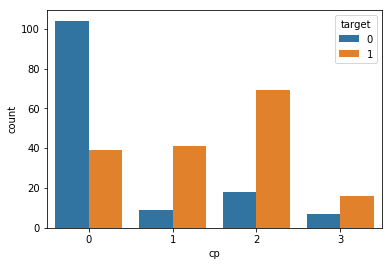

In [60]:
sns.countplot(x = 'cp', data = df, hue = 'target')

In [ ]:
#Chest pain type 2 resulted in more heart disease

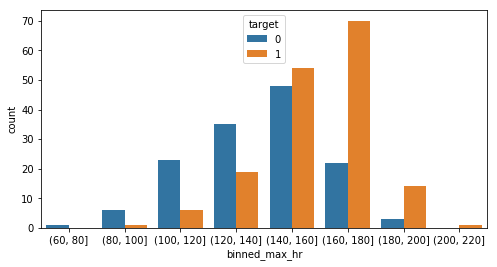

In [70]:
#Maximum heart rate and heart disease

plt.figure(figsize = (8,4))
bins = [60,80,100,120,140,160,180,200,220]

df['binned_max_hr'] = pd.cut(df['thalach'], bins)
sns.countplot(x = 'binned_max_hr', data = df, hue = 'target')


In [ ]:
#Maximum heart rate over 140 have resulted in heart disease